<a href="https://colab.research.google.com/github/v-onuphrienko/Project.Study/blob/main/CL_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [ ]:
!pip install datasets
!pip install kaggle
!pip install catboost


import os
os.environ['KAGGLE_USERNAME'] = "vladislavonufrienko"
os.environ['KAGGLE_KEY'] = "016b79743f0fdd8115c7a7633277c4c9"

import pandas as pd

from sklearn.datasets import fetch_openml
from datasets import load_dataset

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00


# space

In [ ]:
try:
    space = (
    pd.read_csv('https://raw.githubusercontent.com/v-onuphrienko/Project.Study/main/14.%20HW1_ML_base/spaceship.csv', delimiter = ',')
)
except FileNotFoundError:
    print("File not found.")
except pd.errors.EmptyDataError:
    print("No data")
except pd.errors.ParserError:
    print("Parse error")
except Exception:
    print("Some other exception")

In [ ]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# horse

In [ ]:
!kaggle competitions download -c playground-series-s3e22

  0% 0.00/59.7k [00:00<?, ?B/s]
100% 59.7k/59.7k [00:00<00:00, 71.1MB/s]


In [ ]:
!unzip -o playground-series-s3e22.zip

Archive:  playground-series-s3e22.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
horse = pd.read_csv('train.csv')
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [ ]:
del horse['id']

In [ ]:
horse['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

horse['outcome'] = encoder.fit_transform(horse[['outcome']])

# Rideshare

In [ ]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma
!unzip -o uber-and-lyft-dataset-boston-ma.zip

Dataset URL: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma
License(s): CC0-1.0
 83% 37.0M/44.5M [00:00<00:00, 59.5MB/s]
100% 44.5M/44.5M [00:00<00:00, 73.2MB/s]
Archive:  uber-and-lyft-dataset-boston-ma.zip
  inflating: rideshare_kaggle.csv    


In [ ]:
rideshare = pd.read_csv('rideshare_kaggle.csv')
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

rideshare['cab_type'] = encoder.fit_transform(rideshare[['cab_type']])

In [ ]:
del rideshare['id']
del rideshare['datetime']
del rideshare['timestamp']

In [ ]:
rideshare = rideshare.sample(n=500000)
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 301843 to 183237
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         500000 non-null  int64  
 1   day                          500000 non-null  int64  
 2   month                        500000 non-null  int64  
 3   timezone                     500000 non-null  object 
 4   source                       500000 non-null  object 
 5   destination                  500000 non-null  object 
 6   cab_type                     500000 non-null  float64
 7   product_id                   500000 non-null  object 
 8   name                         500000 non-null  object 
 9   price                        460310 non-null  float64
 10  distance                     500000 non-null  float64
 11  surge_multiplier             500000 non-null  float64
 12  latitude                     500000 non-null  float64
 13 

In [ ]:
try:
    loan_pred = (
    pd.read_csv('https://raw.githubusercontent.com/v-onuphrienko/Project.Study/main/14.%20HW1_ML_base/train_u6lujuX_CVtuZ9i.csv', delimiter = ',')
)
except FileNotFoundError:
    print("File not found.")
except pd.errors.EmptyDataError:
    print("No data")
except pd.errors.ParserError:
    print("Parse error")
except Exception:
    print("Some other exception")

In [ ]:
loan_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_pred['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# Bank Churn

In [ ]:
!kaggle competitions download -o --force -c playground-series-s4e1
!unzip -o playground-series-s4e1.zip

100% 6.81M/6.81M [00:00<00:00, 67.1MB/s]
100% 6.81M/6.81M [00:00<00:00, 66.7MB/s]
Archive:  playground-series-s4e1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
bank_churn = pd.read_csv('train.csv')
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
bank_churn['Exited'].unique()

array([0, 1])

# Код

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging

logging.getLogger().setLevel(logging.ERROR)

def classification_pipeline(dataset, target_column):
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    models = {
        'GradientBoosting': GradientBoostingClassifier(),
        'CatBoost': CatBoostClassifier(verbose=0),
        'LGBMBoost': LGBMClassifier(verbosity=-1)
    }

    results = {}
    roc_data = {}
    for name, model in models.items():
        model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        cv_results = cross_val_score(model_pipeline, X_train, y_train, cv=5)
        cv_accuracy_mean = np.mean(cv_results)
        cv_accuracy_std = np.std(cv_results)

        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}


        results[name] = {
            'CV_Accuracy_mean': cv_accuracy_mean,
            'CV_Accuracy_std': cv_accuracy_std,
            'Test_Accuracy': accuracy_score(y_test, y_pred),
            'Test_Precision': precision_score(y_test, y_pred),
            'Test_Recall': recall_score(y_test, y_pred),
            'Test_F1': f1_score(y_test, y_pred),
            'Test_ROC_AUC': roc_auc
        }

    metrics_table = pd.DataFrame(results).T
    return metrics_table, roc_data

## Доверительные интервалы добавлены

## Линейная Регрессия

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

def classification_pipeline(dataset, target_column):
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ])

    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    cv_scores = cross_val_score(full_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
    cv_accuracy_mean = np.mean(cv_scores)
    cv_accuracy_std = np.std(cv_scores)
    se = cv_accuracy_std / np.sqrt(len(cv_scores))

    full_pipeline.fit(X_train, y_train)
    y_pred = full_pipeline.predict(X_test)
    y_pred_proba = full_pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for AUC

    # Collect results with additional metrics
    results = {
        'LogisticRegression': {
            'CV_Accuracy_mean': cv_accuracy_mean,
            'CV_Accuracy_CI_lower': cv_accuracy_mean - 1.96 * se,
            'CV_Accuracy_CI_upper': cv_accuracy_mean + 1.96 * se,
            'Test_Accuracy': accuracy_score(y_test, y_pred),
            'Test_Precision': precision_score(y_test, y_pred),
            'Test_Recall': recall_score(y_test, y_pred),
            'Test_F1': f1_score(y_test, y_pred),
            'Test_ROC_AUC': roc_auc_score(y_test, y_pred_proba),
            'Confidence_Interval': 1.96 * np.std(y_pred) / np.sqrt(len(y_pred))
        }
    }

    plot_confusion_matrix(y_test, y_pred, "Logistic Regression")  # Assuming this function is defined elsewhere

    metrics_table = pd.DataFrame(results).T
    return metrics_table

def plot_confusion_matrix(y_true, y_pred, model_name, y_pred_proba=None):
    # Считаем confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')

    # Добавление текста с метриками на график
    plt.text(x=-0.5, y=-0.5, s=f"Accuracy: {accuracy_score(y_true, y_pred):.2f}\nPrecision: {precision_score(y_true, y_pred, average='macro'):.2f}\nRecall: {recall_score(y_true, y_pred, average='macro'):.2f}\nF1 Score: {f1_score(y_true, y_pred, average='macro'):.2f}", fontsize=12)

    if y_pred_proba is not None:
        plt.text(x=1.5, y=-0.5, s=f"ROC AUC: {roc_auc_score(y_true, y_pred_proba):.2f}", fontsize=12)

    plt.show()

    # Вывод дополнительной статистики после графика
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1 Score": f1_score(y_true, y_pred, average='macro')
    }
    if y_pred_proba is not None:
        metrics["ROC AUC"] = roc_auc_score(y_true, y_pred_proba)

    print("Detailed Classification Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import pandas as pd

def classification_pipeline_m(dataset, target_column):
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Update classifier to handle multiclass scenario
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', OneVsRestClassifier(LogisticRegression(random_state=42, multi_class='ovr')))
    ])

    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    cv_scores = cross_val_score(full_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
    cv_accuracy_mean = np.mean(cv_scores)
    cv_accuracy_std = np.std(cv_scores)
    se = cv_accuracy_std / np.sqrt(len(cv_scores))

    full_pipeline.fit(X_train, y_train)
    y_pred = full_pipeline.predict(X_test)
    y_pred_proba = full_pipeline.predict_proba(X_test)

    # Adapt metrics for multiclass
    results = {
        'LogisticRegression': {
            'CV_Accuracy_mean': cv_accuracy_mean,
            'CV_Accuracy_CI_lower': cv_accuracy_mean - 1.96 * se,
            'CV_Accuracy_CI_upper': cv_accuracy_mean + 1.96 * se,
            'Test_Accuracy': accuracy_score(y_test, y_pred),
            'Test_Precision': precision_score(y_test, y_pred, average='macro'),
            'Test_Recall': recall_score(y_test, y_pred, average='macro'),
            'Test_F1': f1_score(y_test, y_pred, average='macro'),
            'Test_ROC_AUC': roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_pred_proba, multi_class='ovr'),
            'Confidence_Interval': 1.96 * np.std(y_pred) / np.sqrt(len(y_pred))
        }
    }

    plot_confusion_matrix(y_test, y_pred, "Logistic Regression")  # Assuming this function is defined elsewhere

    metrics_table = pd.DataFrame(results).T
    return metrics_table

def plot_confusion_matrix(y_true, y_pred, model_name, y_pred_proba=None):
    # Считаем confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')

    # Добавление текста с метриками на график
    plt.text(x=-0.5, y=-0.5, s=f"Accuracy: {accuracy_score(y_true, y_pred):.2f}\nPrecision: {precision_score(y_true, y_pred, average='macro'):.2f}\nRecall: {recall_score(y_true, y_pred, average='macro'):.2f}\nF1 Score: {f1_score(y_true, y_pred, average='macro'):.2f}", fontsize=12)

    if y_pred_proba is not None:
        plt.text(x=1.5, y=-0.5, s=f"ROC AUC: {roc_auc_score(y_true, y_pred_proba):.2f}", fontsize=12)

    plt.show()

    # Вывод дополнительной статистики после графика
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1 Score": f1_score(y_true, y_pred, average='macro')
    }
    if y_pred_proba is not None:
        metrics["ROC AUC"] = roc_auc_score(y_true, y_pred_proba)

    print("Detailed Classification Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")


In [ ]:
import plotly.express as px

def plot_top_feature_importances_plotly(feature_importances, top_n=100):
    for model_name, importances in feature_importances.items():
        if isinstance(importances, pd.Series):
            top_features = importances.sort_values(ascending=False).head(top_n)
        else:
            top_features = pd.Series(importances).sort_values(ascending=False).head(top_n)

        df = top_features.reset_index()
        df.columns = ['Feature', 'Importance']

        df['Color'] = df['Importance'].apply(lambda x: 'blue' if x >= 0 else 'red')

        # Create the plot using Plotly
        fig = px.bar(df, x='Feature', y='Importance', title=f'Важность признаков: {model_name}',
                     color='Color', color_discrete_map={'blue': 'blue', 'red': 'red'})
        fig.update_layout(xaxis_title="Признаки",
                          yaxis_title="Важность признака",
                          xaxis={'categoryorder':'total descending'},
                          title_x=0.5)
        fig.show()

## binary

In [ ]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from scipy.stats import norm
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
#from sklearn.model_selection import cross_val_score, train_test_split
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.compose import ColumnTransformer
#from sklearn.ensemble import GradientBoostingClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
#
#def classification_pipeline_bi(dataset, target_column):
#    X = dataset.drop(columns=[target_column])
#    y = dataset[target_column]
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
#    categorical_features = X_train.select_dtypes(include=['object']).columns
#    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
#
#    categorical_transformer = Pipeline(steps=[
#        ('imputer', SimpleImputer(strategy='most_frequent')),
#        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
#    ])
#    numerical_transformer = Pipeline(steps=[
#        ('imputer', SimpleImputer(strategy='mean')),
#        ('scaler', StandardScaler())
#    ])
#
#    preprocessor = ColumnTransformer(
#        transformers=[
#            ('num', numerical_transformer, numerical_features),
#            ('cat', categorical_transformer, categorical_features)
#        ])
#
#    models = {
#        'GradientBoosting': GradientBoostingClassifier(),
#        'CatBoost': CatBoostClassifier(verbose=0),
#        'LGBMBoost': LGBMClassifier(verbosity=-1)
#    }
#
#    results = {}
#    roc_data = {}
#    mean_std_results = {}
#    feature_importances = {}
#
#    for name, model in models.items():
#        model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
#
#        cv_results = cross_val_score(model_pipeline, X_train, y_train, cv=5)
#        cv_accuracy_mean = np.mean(cv_results)
#        cv_accuracy_std = np.std(cv_results)
#        se = cv_accuracy_std / np.sqrt(len(cv_results))
#
#        model_pipeline.fit(X_train, y_train)
#        y_pred = model_pipeline.predict(X_test)
#        y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
#
#        results[name] = {
#            'CV_Accuracy_mean': cv_accuracy_mean,
#            'CV_Accuracy_CI_lower': cv_accuracy_mean - 1.96 * se,
#            'CV_Accuracy_CI_upper': cv_accuracy_mean + 1.96 * se,
#            'Test_Accuracy': accuracy_score(y_test, y_pred),
#            'Test_Precision': precision_score(y_test, y_pred),
#            'Test_Recall': recall_score(y_test, y_pred),
#            'Test_F1': f1_score(y_test, y_pred),
#            'Test_ROC_AUC': roc_auc_score(y_test, y_pred_proba),
#            'Confidence_Interval': 1.96 * np.std(y_pred) / np.sqrt(len(y_pred))
#        }
#
#        roc_data[name] = {'fpr': roc_curve(y_test, y_pred_proba)[0], 'tpr': roc_curve(y_test, y_pred_proba)[1], 'roc_auc': roc_auc_score(y_test, y_pred_proba)}
#
#        mean_std_results[name] = {
#            'Mean': cv_accuracy_mean,
#            'Std': cv_accuracy_std
#        }
#
#        # Построение графика
#        plt.figure(figsize=(6, 4))
#
#        # Генерируем значения для аппроксимации нормального распределения
#        mean = mean_std_results[name]['Mean']
#        std = mean_std_results[name]['Std']
#        x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
#
#        # Вычисляем плотность вероятности нормального распределения
#        y = norm.pdf(x, mean, std)
#
#        # Отображаем аппроксимацию нормального распределения
#        plt.plot(x, y, label=f'{name} Normal Approximation', linestyle='--')
#
#        # Отображение границ доверительного интервала
#        ci_lower = mean - 1.96 * std
#        ci_upper = mean + 1.96 * std
#        plt.vlines(x=ci_lower, ymin=0, ymax=norm.pdf(ci_lower, mean, std), color='r', linestyle='-', label='95% CI lower')
#        plt.vlines(x=ci_upper, ymin=0, ymax=norm.pdf(ci_upper, mean, std), color='r', linestyle='-', label='95% CI upper')
#
#        # Отображение среднего значения точности
#        plt.scatter(mean, norm.pdf(mean, mean, std), color='r')
#
#        # Настройка осей и легенды
#        plt.xlabel('Прогнозируемая точность')
#        plt.ylabel('Плотность вероятности')
#        plt.title(f'Нормальное распределение точности модели {name} с 95% ДИ')
#        plt.legend(loc='upper left', bbox_to_anchor=(1,1))
#
#        # Отображение графика
#        plt.grid(True)
#        plt.show()
#
#        # Retrieve feature importances
#        if hasattr(model, 'feature_importances_'):
#
#          # Proper way to concatenate feature names from both numeric and categorical transformations
#          numeric_features_processed = numerical_features  # Assuming no changes in names
#          categorical_features_processed = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
#          feature_names = list(numeric_features_processed) + list(categorical_features_processed)
#          # Creating a Series of feature importances
#          feature_importances[name] = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
#
#    # Print or return results, ROC data, and feature importances
#    metrics_table = pd.DataFrame(results).T
#    return metrics_table, roc_data, mean_std_results, feature_importances

In [ ]:
def plot_top_feature_importances(feature_importances, top_n=20):
    for model_name, importances in feature_importances.items():
        # Sort and select top N importances
        if isinstance(importances, pd.Series):
            top_features = importances.sort_values(ascending=False).head(top_n)
        else:
            top_features = pd.Series(importances).sort_values(ascending=False).head(top_n)

        # Plot
        plt.figure(figsize=(10, 6))
        top_features.plot(kind='bar', color=['blue' if x >= 0 else 'red' for x in top_features])
        plt.title(f'Top {top_n} Feature Importances for {model_name}')
        plt.ylabel('Importance')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

#Worked

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import ttest_ind
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.rcParams.update({'font.size': 12})
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def classification_pipeline_bi(dataset, target_column):
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    models = {
        'XGBoost': XGBClassifier(),
        'CatBoost': CatBoostClassifier(verbose=0),
        'LGBMBoost': LGBMClassifier(verbosity=-1)
    }

    results = {}
    roc_data = {}
    feature_importances = {}
    all_accuracy_scores = {}

    for name, model in models.items():
        model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        cv_results = cross_val_score(model_pipeline, X_train, y_train, cv=5)
        cv_accuracy_mean = np.mean(cv_results)
        cv_accuracy_std = np.std(cv_results)
        se = cv_accuracy_std / np.sqrt(len(cv_results))

        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

        all_accuracy_scores[name] = cv_results

        results[name] = {
            'CV_Accuracy_mean': cv_accuracy_mean,
            'CV_Accuracy_CI_lower': cv_accuracy_mean - 1.96 * se,
            'CV_Accuracy_CI_upper': cv_accuracy_mean + 1.96 * se,
            'Test_Accuracy': accuracy_score(y_test, y_pred),
            'Test_Precision': precision_score(y_test, y_pred),
            'Test_Recall': recall_score(y_test, y_pred),
            'Test_F1': f1_score(y_test, y_pred),
            'Test_ROC_AUC': roc_auc_score(y_test, y_pred_proba)
        }

        roc_data[name] = {'fpr': roc_curve(y_test, y_pred_proba)[0], 'tpr': roc_curve(y_test, y_pred_proba)[1], 'roc_auc': roc_auc_score(y_test, y_pred_proba)}
        plot_confusion_matrix(y_test, y_pred, name)

        if hasattr(model, 'feature_importances_'):
            feature_names = list(numerical_features) + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
            feature_importances_raw = model.feature_importances_
            feature_importances_normalized = 100 * feature_importances_raw / feature_importances_raw.sum()
            feature_importances[name] = pd.Series(feature_importances_normalized, index=feature_names).sort_values(ascending=False)

    metrics_table = pd.DataFrame(results).T
    return metrics_table, roc_data, feature_importances, all_accuracy_scores

def bootstrap_metrics(all_scores, num_iterations=1000):
    bootstrapped_metrics = {}

    for model, scores in all_scores.items():
        bootstrapped_metrics[model] = {
            'CV_Accuracy_mean': []
        }

        for _ in range(num_iterations):
            sample_indices = np.random.choice(len(scores), len(scores), replace=True)
            bootstrapped_accuracy = [scores[i] for i in sample_indices]
            bootstrapped_metrics[model]['CV_Accuracy_mean'].append(np.mean(bootstrapped_accuracy))

    return bootstrapped_metrics

def calculate_statistical_significance_bootstrap(bootstrapped_metrics):
    p_values = {}
    for metric in ['CV_Accuracy_mean']:
        for i, model_i in enumerate(bootstrapped_metrics.keys()):
            for j, model_j in enumerate(bootstrapped_metrics.keys()):
                if i < j:
                    stat, p_value = ttest_ind(
                        bootstrapped_metrics[model_i][metric],
                        bootstrapped_metrics[model_j][metric],
                        equal_var=False
                    )
                    p_values[f'{model_i} vs {model_j} ({metric})'] = p_value
    return p_values

def plot_bootstrap_distributions_with_table(bootstrapped_metrics, metrics_table, p_values, metric):
    plt.figure(figsize=(12, 8))
    for model in bootstrapped_metrics:
        sns.histplot(bootstrapped_metrics[model][metric], kde=True, label=model)

    plt.xlabel(metric)
    plt.ylabel('Частота')
    plt.legend()
    plt.title(f'Распределение бутстреппированных {metric} для различных моделей')

    # Создание строки с метриками
    textstr = ''
    textstr += 'P-values:\n'
    for comparison, p_value in p_values.items():
        textstr += f'{comparison}: {p_value:.6e}\n'

    # Настройка стиля текстового поля
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # Добавление текста чуть выше нижней части фигуры
    plt.figtext(0.02, 0.02, textstr, fontsize=10, verticalalignment='top', bbox=props)

    plt.show()

## multi-class

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import ttest_ind
import seaborn as sns

def classification_pipeline_multi(dataset, target_column):
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    models = {
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'CatBoost': CatBoostClassifier(verbose=0),
        'LGBMBoost': LGBMClassifier(verbosity=-1)
    }

    results = {}
    feature_importances = {}
    all_accuracy_scores = {}

    for name, model in models.items():
        model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        cv_results = cross_val_score(model_pipeline, X_train, y_train, cv=5)
        cv_accuracy_mean = np.mean(cv_results)
        cv_accuracy_std = np.std(cv_results)
        se = cv_accuracy_std / np.sqrt(len(cv_results))

        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        y_pred_proba = model_pipeline.predict_proba(X_test) if hasattr(model_pipeline.named_steps['model'], "predict_proba") else None

        all_accuracy_scores[name] = cv_results

        results[name] = {
            'CV_Accuracy_mean': cv_accuracy_mean,
            'CV_Accuracy_CI_lower': cv_accuracy_mean - 1.96 * se,
            'CV_Accuracy_CI_upper': cv_accuracy_mean + 1.96 * se,
            'Test_Accuracy': accuracy_score(y_test, y_pred),
            'Test_Precision': precision_score(y_test, y_pred, average='macro'),
            'Test_Recall': recall_score(y_test, y_pred, average='macro'),
            'Test_F1': f1_score(y_test, y_pred, average='macro')
        }

        plot_confusion_matrix(y_test, y_pred, name, y_pred_proba)

        if hasattr(model, 'feature_importances_'):
            feature_names = list(numerical_features) + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
            feature_importances_raw = model.feature_importances_
            feature_importances_normalized = 100 * feature_importances_raw / feature_importances_raw.sum()
            feature_importances[name] = pd.Series(feature_importances_normalized, index=feature_names).sort_values(ascending=False)

    return results, feature_importances, all_accuracy_scores

def plot_confusion_matrix(y_true, y_pred, model_name, y_pred_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')

    plt.text(x=-0.5, y=-0.5, s=f"Accuracy: {accuracy_score(y_true, y_pred):.2f}\nPrecision: {precision_score(y_true, y_pred, average='macro'):.2f}\nRecall: {recall_score(y_true, y_pred, average='macro'):.2f}\nF1 Score: {f1_score(y_true, y_pred, average='macro'):.2f}", fontsize=12)

    if y_pred_proba is not None:
        plt.text(x=1.5, y=-0.5, s=f"ROC AUC: {roc_auc_score(y_true, y_pred_proba, multi_class='ovr'):.2f}", fontsize=12)

    plt.show()

def bootstrap_metrics(all_scores, num_iterations=1000):
    bootstrapped_metrics = {}

    for model, scores in all_scores.items():
        bootstrapped_metrics[model] = {
            'CV_Accuracy_mean': []
        }

        for _ in range(num_iterations):
            sample_indices = np.random.choice(len(scores), len(scores), replace=True)
            bootstrapped_accuracy = [scores[i] for i in sample_indices]
            bootstrapped_metrics[model]['CV_Accuracy_mean'].append(np.mean(bootstrapped_accuracy))

    return bootstrapped_metrics

def calculate_statistical_significance_bootstrap(bootstrapped_metrics):
    p_values = {}
    for metric in ['CV_Accuracy_mean']:
        for i, model_i in enumerate(bootstrapped_metrics.keys()):
            for j, model_j in enumerate(bootstrapped_metrics.keys()):
                if i < j:
                    stat, p_value = ttest_ind(
                        bootstrapped_metrics[model_i][metric],
                        bootstrapped_metrics[model_j][metric],
                        equal_var=False
                    )
                    p_values[f'{model_i} vs {model_j} ({metric})'] = p_value
    return p_values

def plot_bootstrap_distributions_with_table(bootstrapped_metrics, metrics_table, p_values, metric):
    plt.figure(figsize=(12, 8))
    for model in bootstrapped_metrics:
        sns.histplot(bootstrapped_metrics[model][metric], kde=True, label=model)

    plt.xlabel(metric)
    plt.ylabel('Частота')
    plt.legend()
    plt.title(f'Распределение бутстреппированных {metric} для различных моделей')

    textstr = ''
    textstr += 'P-values:\n'
    for comparison, p_value in p_values.items():
        textstr += f'{comparison}: {p_value:.6e}\n'

    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.figtext(0.02, 0.02, textstr, fontsize=10, verticalalignment='top', bbox=props)

    plt.show()

In [ ]:
import plotly.express as px

def plot_top_feature_importances_plotly(feature_importances, top_n=100):
    for model_name, importances in feature_importances.items():
        if isinstance(importances, pd.Series):
            top_features = importances.sort_values(ascending=False).head(top_n)
        else:
            top_features = pd.Series(importances).sort_values(ascending=False).head(top_n)

        df = top_features.reset_index()
        df.columns = ['Feature', 'Importance']

        df['Color'] = df['Importance'].apply(lambda x: 'blue' if x >= 0 else 'red')

        # Create the plot using Plotly
        fig = px.bar(df, x='Feature', y='Importance', title=f'Важность признаков: {model_name}',
                     color='Color', color_discrete_map={'blue': 'blue', 'red': 'red'})
        fig.update_layout(xaxis_title="Признаки",
                          yaxis_title="Важность признака",
                          xaxis={'categoryorder':'total descending'},
                          title_x=0.5)
        fig.show()

# space

#### Линейная

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: Convergen

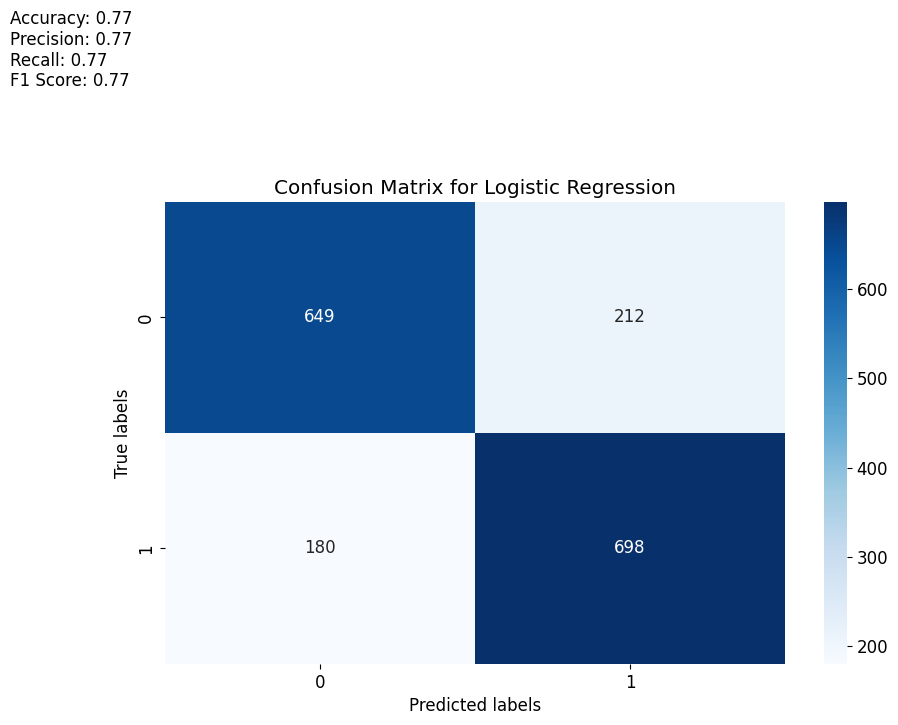

Detailed Classification Metrics:
Accuracy: 0.7746
Precision: 0.7750
Recall: 0.7744
F1 Score: 0.7744
                    CV_Accuracy_CI_lower  CV_Accuracy_CI_upper  \
LogisticRegression               0.78777              0.791752   

                    CV_Accuracy_mean  Confidence_Interval  Test_Accuracy  \
LogisticRegression          0.789761             0.023475       0.774583   

                     Test_F1  Test_Precision  Test_ROC_AUC  Test_Recall  
LogisticRegression  0.780761        0.767033      0.866618     0.794989  


In [ ]:
space_results = classification_pipeline(space, 'Transported')
print(space_results)

#### Ансамбль

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarn

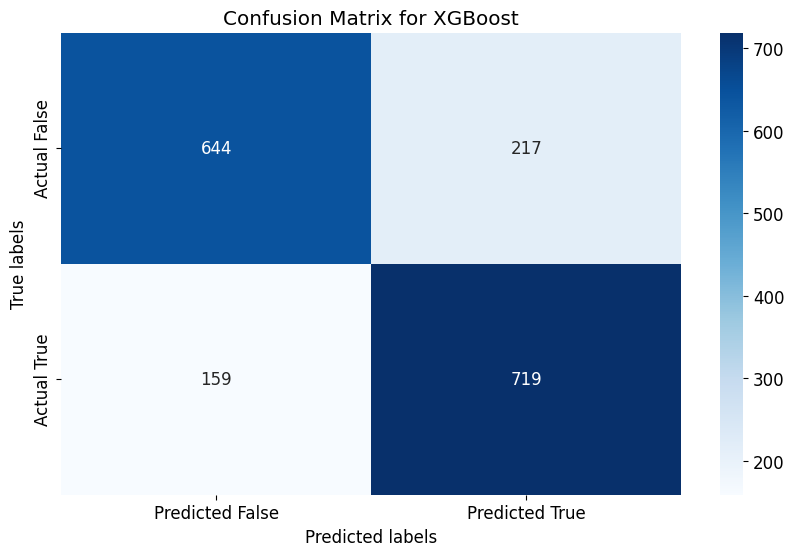

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarn

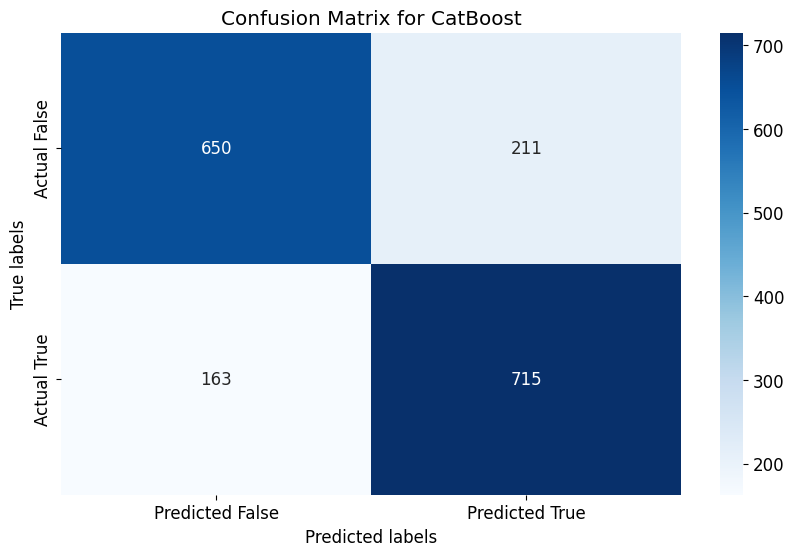

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarn

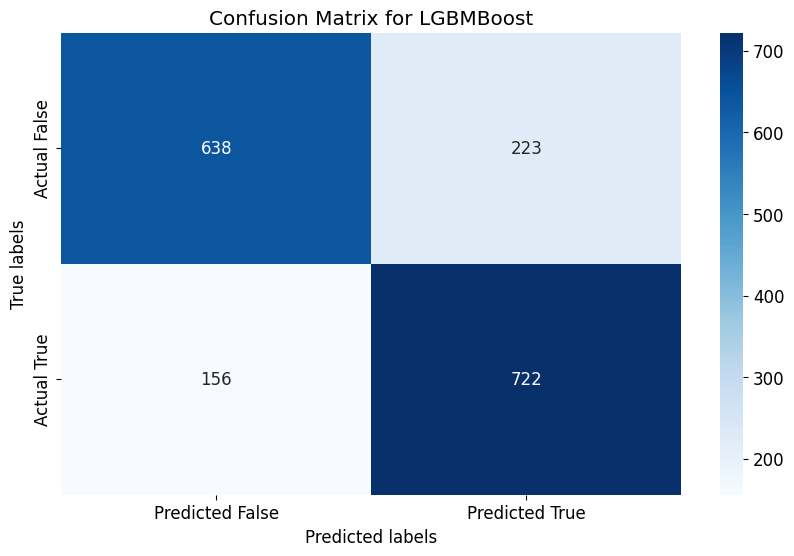

           CV_Accuracy_mean  CV_Accuracy_CI_lower  CV_Accuracy_CI_upper  \
XGBoost            0.789186              0.780286              0.798087   
CatBoost           0.794221              0.786639              0.801803   
LGBMBoost          0.796665              0.789240              0.804090   

           Test_Accuracy  Test_Precision  Test_Recall   Test_F1  Test_ROC_AUC  
XGBoost         0.783784        0.768162     0.818907  0.792723      0.863425  
CatBoost        0.784934        0.772138     0.814351  0.792683      0.870647  
LGBMBoost       0.782059        0.764021     0.822323  0.792101      0.869103  


In [ ]:
metrics_table, roc_data, feature_importances, all_accuracy_scores = classification_pipeline_bi(space, 'Transported')
print(metrics_table)

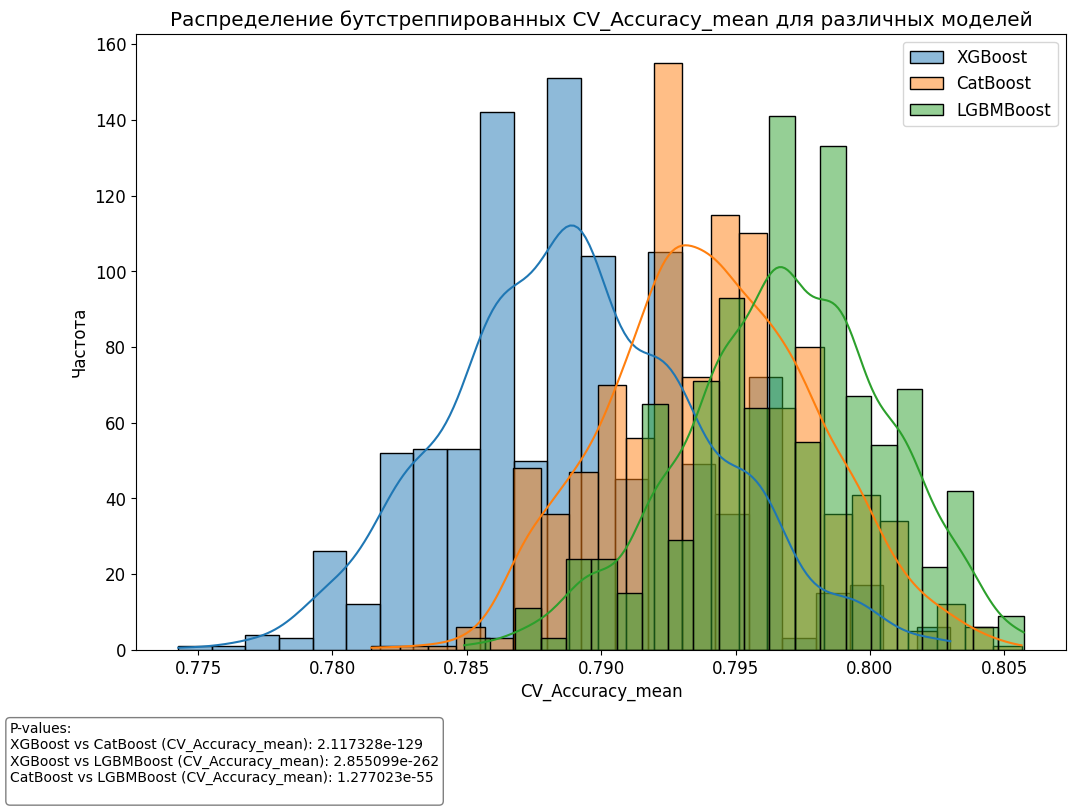

In [ ]:
bootstrapped_metrics = bootstrap_metrics(all_accuracy_scores)
p_values = calculate_statistical_significance_bootstrap(bootstrapped_metrics)
plot_bootstrap_distributions_with_table(bootstrapped_metrics, metrics_table, p_values, 'CV_Accuracy_mean')

In [ ]:
plot_top_feature_importances_plotly(feature_importances, top_n=10)

In [ ]:
top_features = {model: importances.nlargest(10) for model, importances in feature_importances.items()}

# Общие признаки среди топ-10 всех моделей
common_features = set(top_features['XGBoost'].index) & set(top_features['CatBoost'].index) & set(top_features['LGBMBoost'].index)
common_features_list = list(common_features)  # Преобразуем множество в список

# Создание DataFrame только с общими признаками
common_features_df = pd.DataFrame({
    model: features[common_features_list]
    for model, features in top_features.items() if common_features_list
}).T  # Транспонируем для лучшего отображения

# Визуализация
styled_common_features_df = common_features_df.style.background_gradient(cmap='viridis', axis=None)
styled_common_features_df

,HomePlanet_Mars,ShoppingMall,CryoSleep_True,FoodCourt,HomePlanet_Europa,RoomService,Spa,VRDeck
XGBoost,4.135032,1.256500,65.853561,1.922540,7.379251,2.045291,2.148213,2.493859
CatBoost,5.576219,3.643853,11.089687,10.041775,17.858282,10.383153,17.883865,15.038492
LGBMBoost,2.466667,14.266667,1.800000,14.166667,2.700000,11.466667,15.500000,14.133333


In [ ]:
import plotly.express as px
import pandas as pd

# Подготовка данных
data = {
    'Признаки': [],
    'Ранг Важности': [],
    'Вес Признака': [],  # Добавляем поле для веса признака
    'Модель': []
}

# Топ-3 признака для каждой модели
top_3_features = {
    model: importances.nlargest(3)
    for model, importances in feature_importances.items()
}

# Заполнение данных для графика, включая вес каждого признака
for model, features in top_3_features.items():
    sorted_features = features.sort_values(ascending=False)
    for rank, (feature, importance) in enumerate(sorted_features.items(), 1):
        data['Признаки'].append(feature)
        data['Ранг Важности'].append(rank)
        data['Вес Признака'].append(importance)  # Сохраняем вес признака
        data['Модель'].append(model)

# Создание DataFrame
df = pd.DataFrame(data)

# Создание графика
fig = px.bar(df, x='Признаки', y='Ранг Важности', color='Модель', barmode='group',
             labels={'Ранг Важности': 'Ранг Важности', 'Признаки': 'Признаки'},
             title='Топ-3 важных признаков по моделям',
             hover_data={'Вес Признака': ':.3f'},  # Форматирование веса признака в всплывающей подсказке
             category_orders={"Ранг Важности": [1, 2, 3]},
             text='Ранг Важности')

# Настройка внешнего вида графика
fig.update_layout(xaxis_title='Признаки',
                  yaxis_title='Ранг Важности',
                  legend_title='Модели',
                  title_x=0.5)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Отображение графика
fig.show()


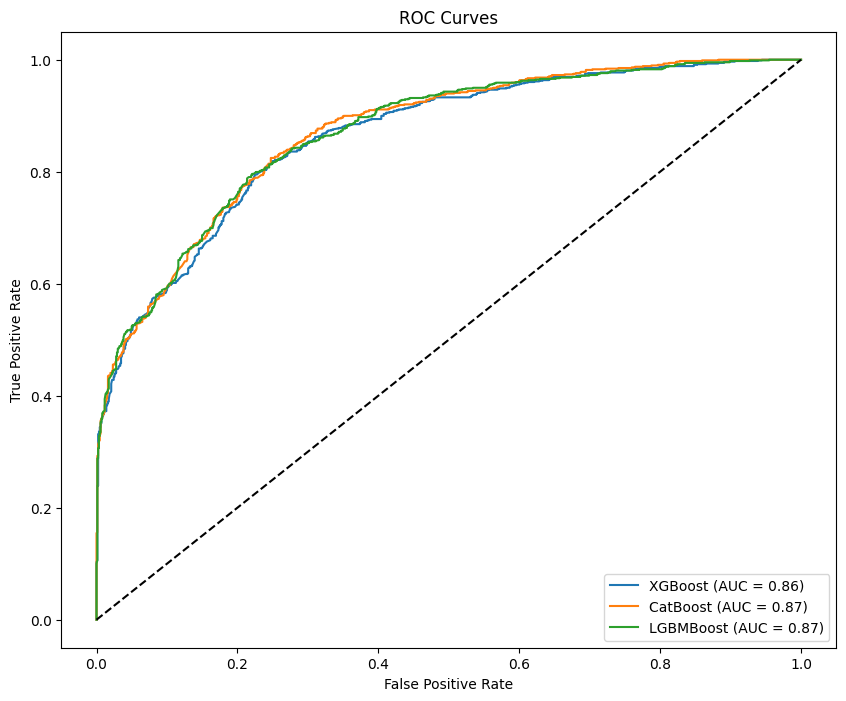

In [ ]:
def plot_roc_curves(roc_data):
    plt.figure(figsize=(10, 8))
    for model, data in roc_data.items():
        plt.plot(data['fpr'], data['tpr'], label=f'{model} (AUC = {data["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curves(roc_data)

# horse


#### Линейная

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


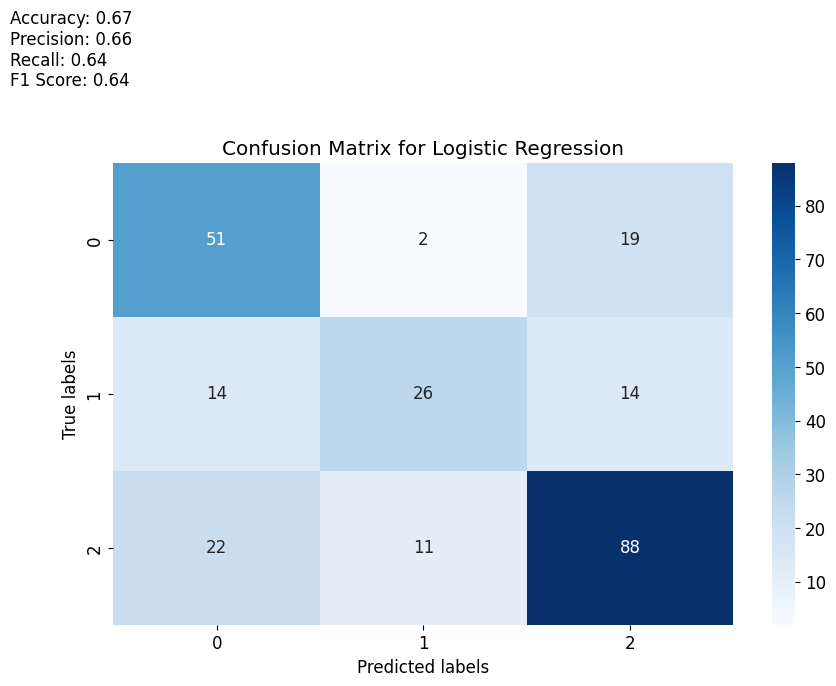

Detailed Classification Metrics:
Accuracy: 0.6680
Precision: 0.6600
Recall: 0.6390
F1 Score: 0.6426
                    CV_Accuracy_CI_lower  CV_Accuracy_CI_upper  \
LogisticRegression              0.655464              0.682592   

                    CV_Accuracy_mean  Confidence_Interval  Test_Accuracy  \
LogisticRegression          0.669028             0.113149       0.668016   

                     Test_F1  Test_Precision  Test_ROC_AUC  Test_Recall  
LogisticRegression  0.642641        0.660049      0.836696     0.639029  


In [ ]:
report_df = classification_pipeline_m(horse, 'outcome')
print(report_df)

#### Ансамбль

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


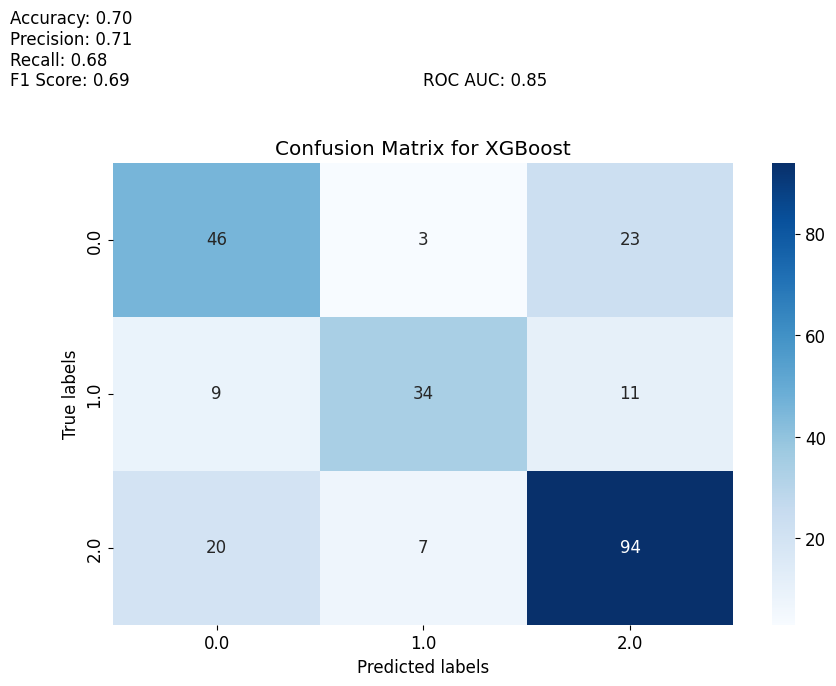

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


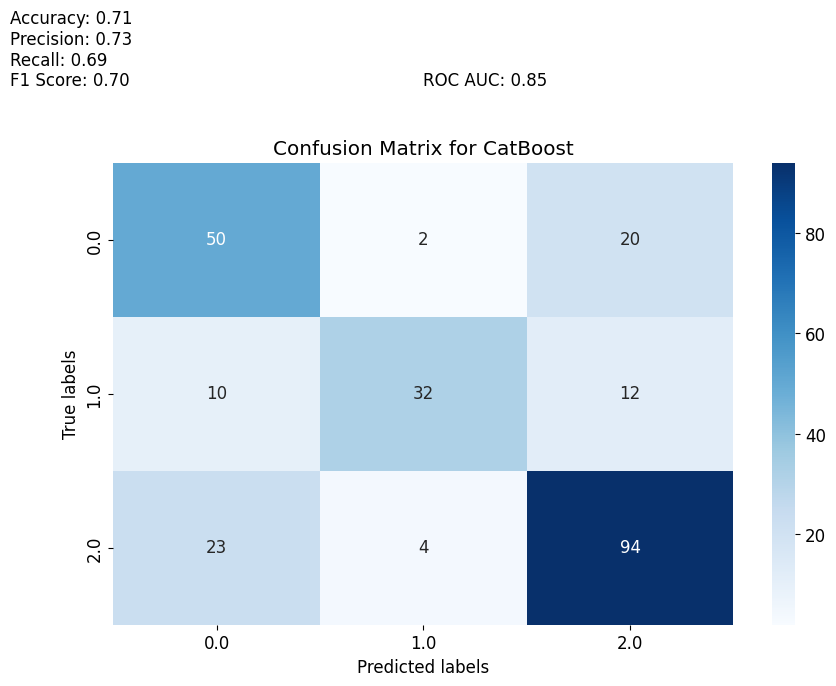

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


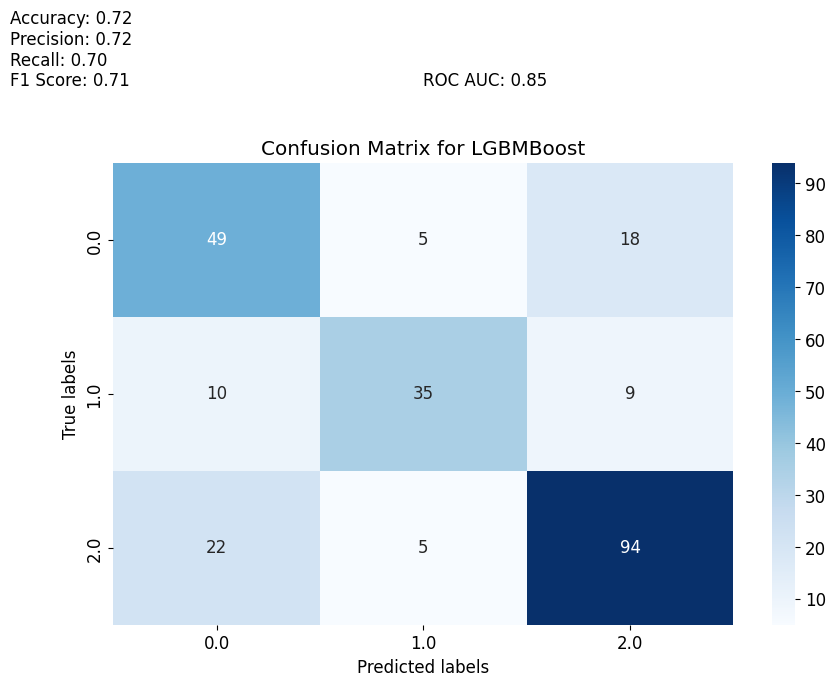

{'XGBoost': {'CV_Accuracy_mean': 0.6964108085935498, 'CV_Accuracy_CI_lower': 0.6726523554133028, 'CV_Accuracy_CI_upper': 0.7201692617737967, 'Test_Accuracy': 0.7044534412955465, 'Test_Precision': 0.7068118686868686, 'Test_Recall': 0.6817926742169167, 'Test_F1': 0.6915826571592492}, 'CatBoost': {'CV_Accuracy_mean': 0.6953545608367944, 'CV_Accuracy_CI_lower': 0.6777031959380796, 'CV_Accuracy_CI_upper': 0.7130059257355091, 'Test_Accuracy': 0.7125506072874493, 'Test_Precision': 0.7301822159146192, 'Test_Recall': 0.6879655137230895, 'Test_F1': 0.7006490224914969}, 'LGBMBoost': {'CV_Accuracy_mean': 0.698410500948572, 'CV_Accuracy_CI_lower': 0.6765655630613477, 'CV_Accuracy_CI_upper': 0.7202554388357963, 'Test_Accuracy': 0.7206477732793523, 'Test_Precision': 0.7198585178383158, 'Test_Recall': 0.7018544026119784, 'Test_F1': 0.7081510290066438}}


In [ ]:
results, feature_importances, all_accuracy_scores = classification_pipeline_multi(horse, 'outcome')
print(results)


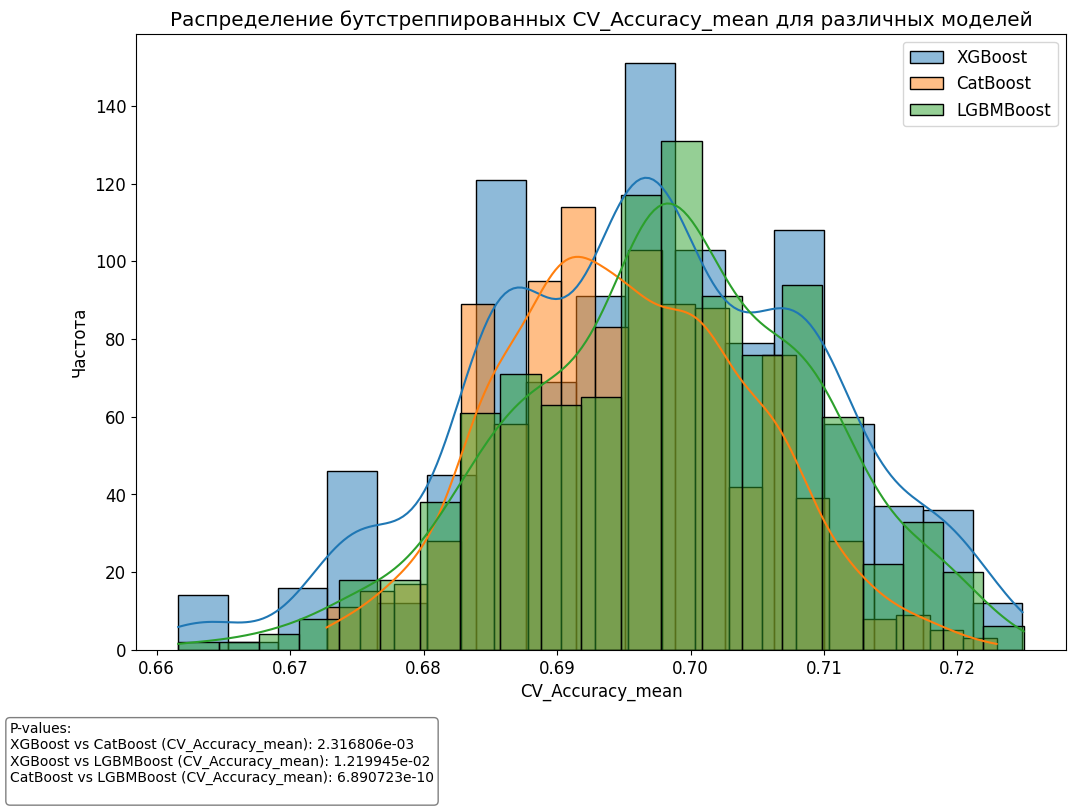

In [ ]:
bootstrapped_metrics = bootstrap_metrics(all_accuracy_scores)
p_values = calculate_statistical_significance_bootstrap(bootstrapped_metrics)
metrics_table = pd.DataFrame(results).T
plot_bootstrap_distributions_with_table(bootstrapped_metrics, metrics_table, p_values, 'CV_Accuracy_mean')

In [ ]:
plot_top_feature_importances_plotly(feature_importances, top_n=10)

In [ ]:
top_features = {model: importances.nlargest(10) for model, importances in feature_importances.items()}

# Общие признаки среди топ-10 всех моделей
common_features = set(top_features['XGBoost'].index) & set(top_features['CatBoost'].index) & set(top_features['LGBMBoost'].index)
common_features_list = list(common_features)  # Преобразуем множество в список

# Создание DataFrame только с общими признаками
common_features_df = pd.DataFrame({
    model: features[common_features_list]
    for model, features in top_features.items() if common_features_list
}).T  # Транспонируем для лучшего отображения

# Визуализация
styled_common_features_df = common_features_df.style.background_gradient(cmap='viridis', axis=None)
styled_common_features_df

,pulse,total_protein,nasogastric_reflux_ph
XGBoost,4.228925,3.146919,4.502244
CatBoost,8.693915,9.152126,6.972882
LGBMBoost,7.677778,8.666667,5.211111


In [ ]:
import plotly.express as px
import pandas as pd

# Подготовка данных
data = {
    'Признаки': [],
    'Ранг Важности': [],
    'Вес Признака': [],  # Добавляем поле для веса признака
    'Модель': []
}

# Топ-3 признака для каждой модели
top_3_features = {
    model: importances.nlargest(3)
    for model, importances in feature_importances.items()
}

# Заполнение данных для графика, включая вес каждого признака
for model, features in top_3_features.items():
    sorted_features = features.sort_values(ascending=False)
    for rank, (feature, importance) in enumerate(sorted_features.items(), 1):
        data['Признаки'].append(feature)
        data['Ранг Важности'].append(rank)
        data['Вес Признака'].append(importance)  # Сохраняем вес признака
        data['Модель'].append(model)

# Создание DataFrame
df = pd.DataFrame(data)

# Создание графика
fig = px.bar(df, x='Признаки', y='Ранг Важности', color='Модель', barmode='group',
             labels={'Ранг Важности': 'Ранг Важности', 'Признаки': 'Признаки'},
             title='Топ-3 важных признаков по моделям',
             hover_data={'Вес Признака': ':.3f'},  # Форматирование веса признака в всплывающей подсказке
             category_orders={"Ранг Важности": [1, 2, 3]},
             text='Ранг Важности')

# Настройка внешнего вида графика
fig.update_layout(xaxis_title='Признаки',
                  yaxis_title='Ранг Важности',
                  legend_title='Модели',
                  title_x=0.5)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Отображение графика
fig.show()


# rideshare

#### Линейная

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

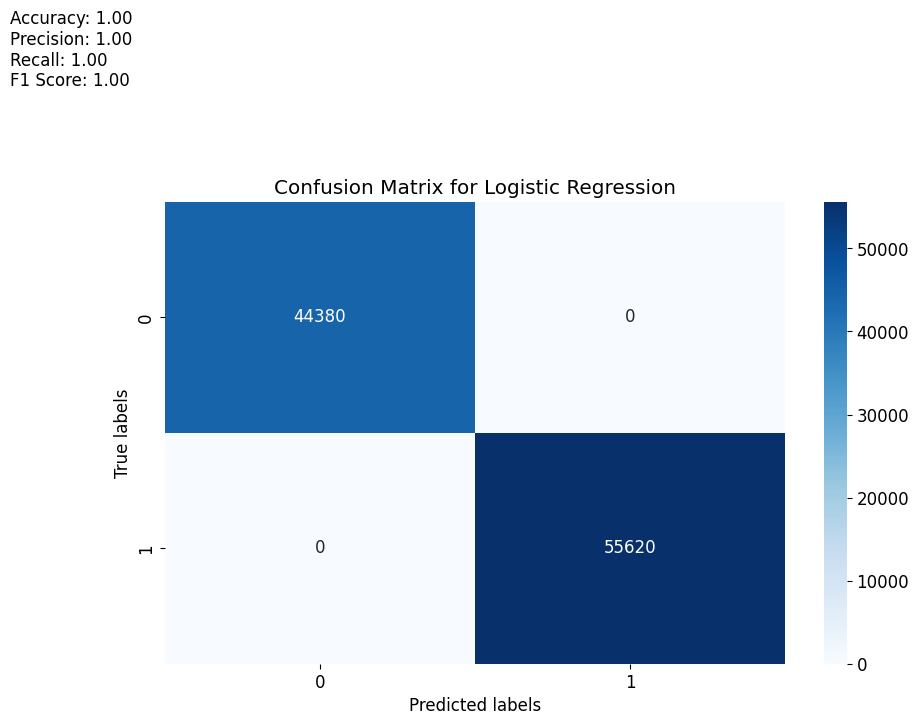

Detailed Classification Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
                    CV_Accuracy_CI_lower  CV_Accuracy_CI_upper  \
LogisticRegression                   1.0                   1.0   

                    CV_Accuracy_mean  Confidence_Interval  Test_Accuracy  \
LogisticRegression               1.0             0.003079            1.0   

                    Test_F1  Test_Precision  Test_ROC_AUC  Test_Recall  
LogisticRegression      1.0             1.0           1.0          1.0  


In [ ]:
report_df = classification_pipeline(rideshare, 'cab_type')
print(report_df)

#### Ансамбль

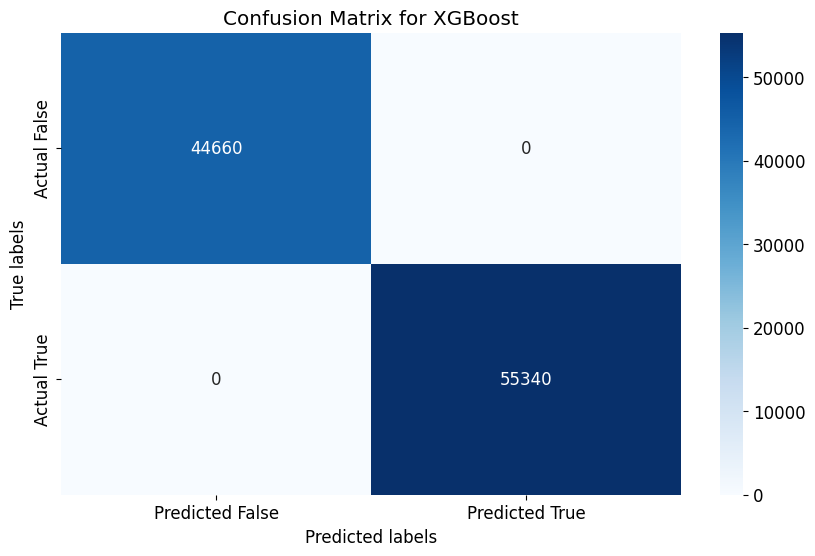

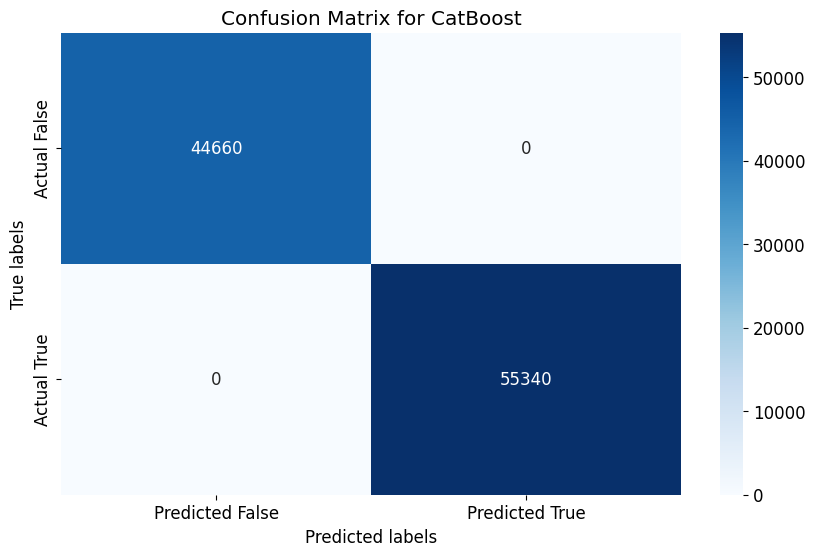

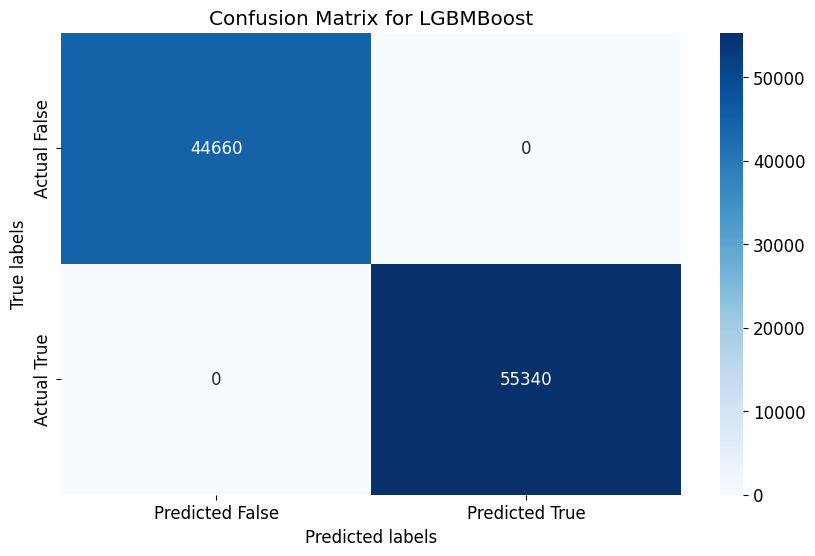

           CV_Accuracy_mean  CV_Accuracy_CI_lower  CV_Accuracy_CI_upper  \
XGBoost                 1.0                   1.0                   1.0   
CatBoost                1.0                   1.0                   1.0   
LGBMBoost               1.0                   1.0                   1.0   

           Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_ROC_AUC  
XGBoost              1.0             1.0          1.0      1.0           1.0  
CatBoost             1.0             1.0          1.0      1.0           1.0  
LGBMBoost            1.0             1.0          1.0      1.0           1.0  


In [ ]:
metrics_table, roc_data, feature_importances, all_accuracy_scores = classification_pipeline_bi(rideshare, 'cab_type')
print(metrics_table)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


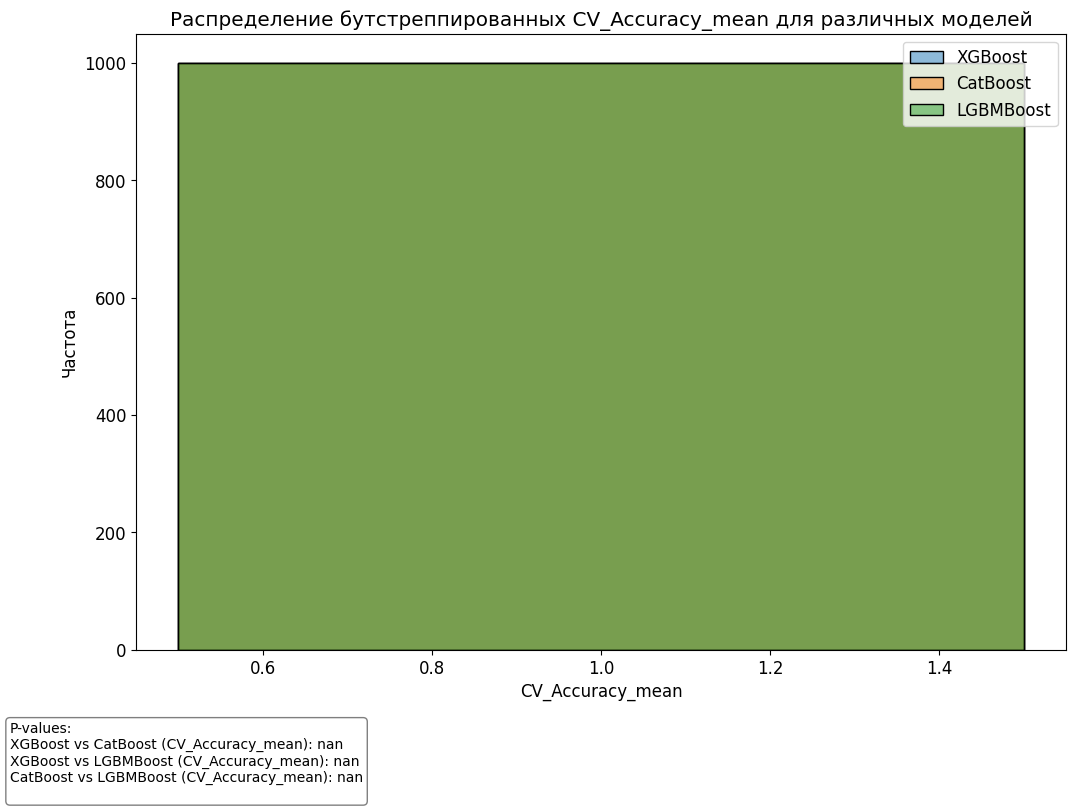

In [ ]:
bootstrapped_metrics = bootstrap_metrics(all_accuracy_scores)
p_values = calculate_statistical_significance_bootstrap(bootstrapped_metrics)
plot_bootstrap_distributions_with_table(bootstrapped_metrics, metrics_table, p_values, 'CV_Accuracy_mean')

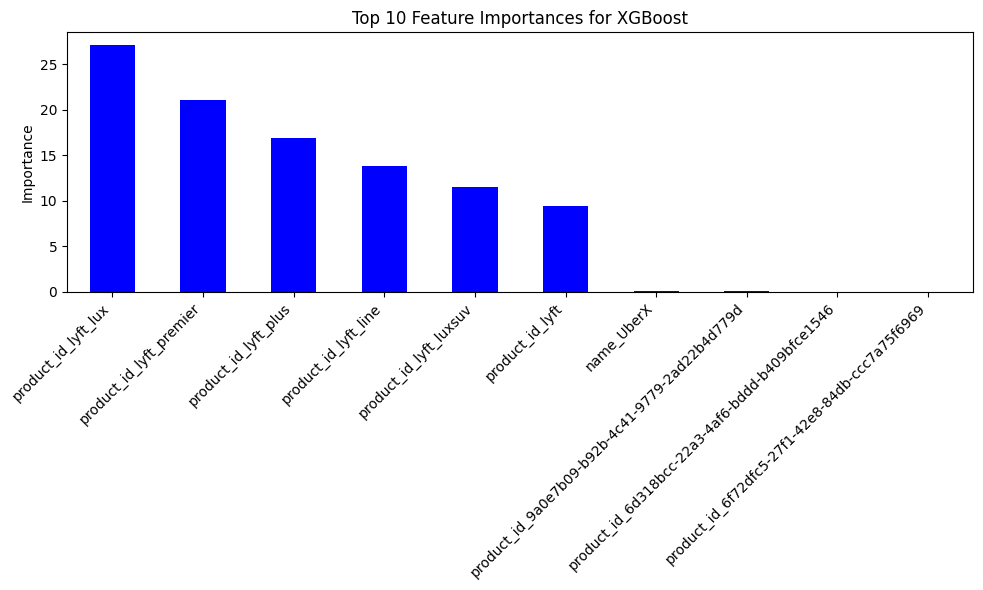

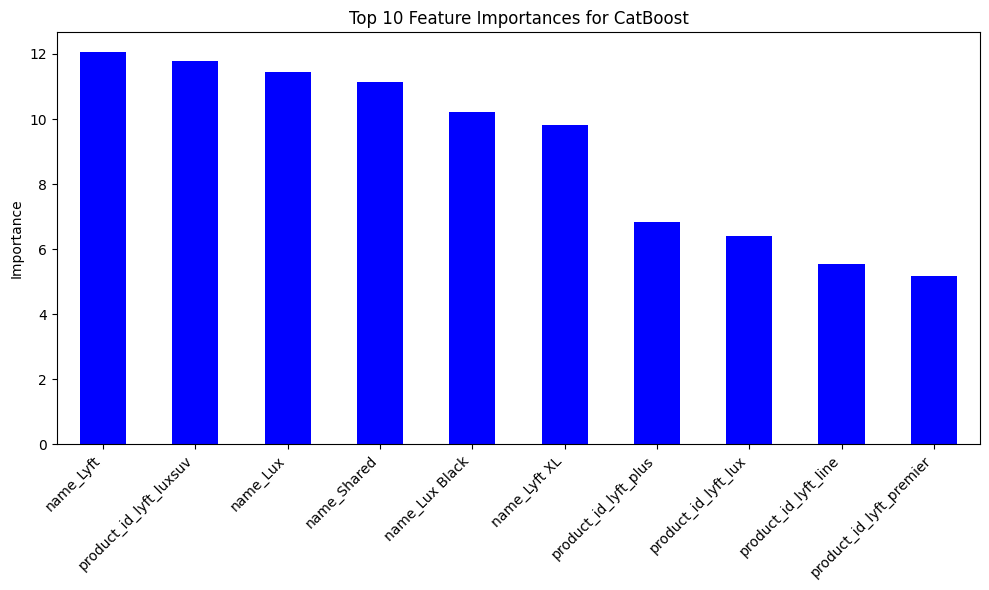

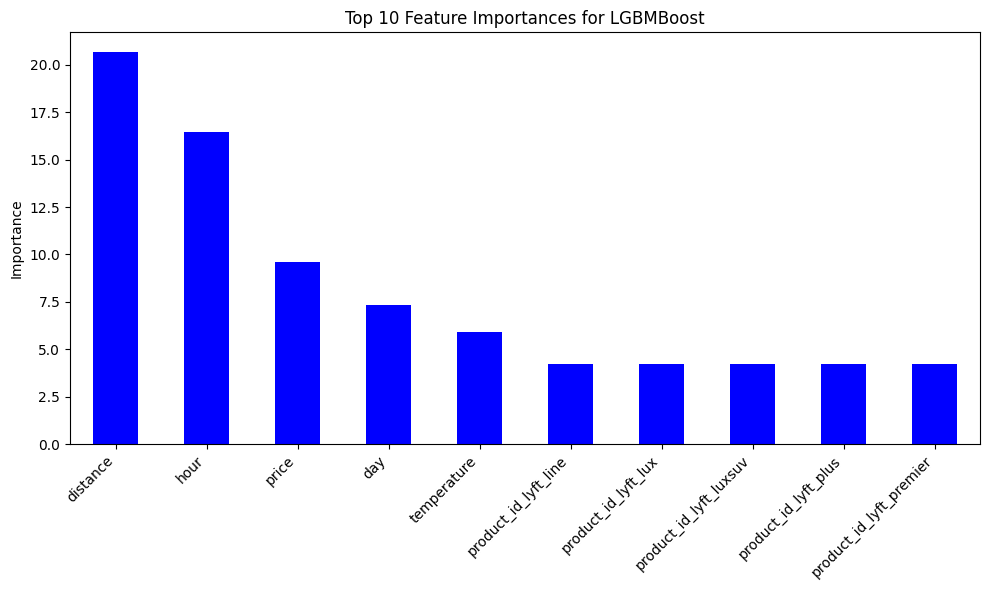

In [ ]:
plot_top_feature_importances(feature_importances, top_n=10)

In [ ]:
top_features = {model: importances.nlargest(10) for model, importances in feature_importances.items()}

# Общие признаки среди топ-10 всех моделей
common_features = set(top_features['XGBoost'].index) & set(top_features['CatBoost'].index) & set(top_features['LGBMBoost'].index)
common_features_list = list(common_features)  # Преобразуем множество в список

# Создание DataFrame только с общими признаками
common_features_df = pd.DataFrame({
    model: features[common_features_list]
    for model, features in top_features.items() if common_features_list
}).T  # Транспонируем для лучшего отображения

# Визуализация
styled_common_features_df = common_features_df.style.background_gradient(cmap='viridis', axis=None)
styled_common_features_df

,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_premier,product_id_lyft_plus
XGBoost,13.809369,27.174576,11.530776,21.099049,16.880453
CatBoost,5.528124,6.405433,11.771658,5.170127,6.842972
LGBMBoost,4.246285,4.246285,4.246285,4.246285,4.246285


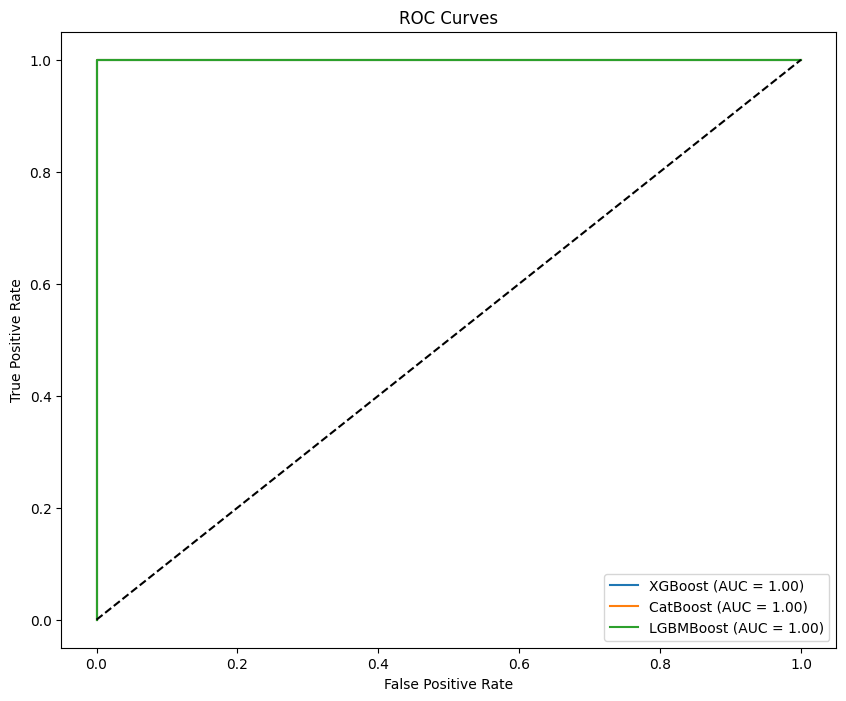

In [ ]:
def plot_roc_curves(roc_data):
    plt.figure(figsize=(10, 8))
    for model, data in roc_data.items():
        plt.plot(data['fpr'], data['tpr'], label=f'{model} (AUC = {data["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()


plot_roc_curves(roc_data)

# Bank Churn

#### Линейная

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

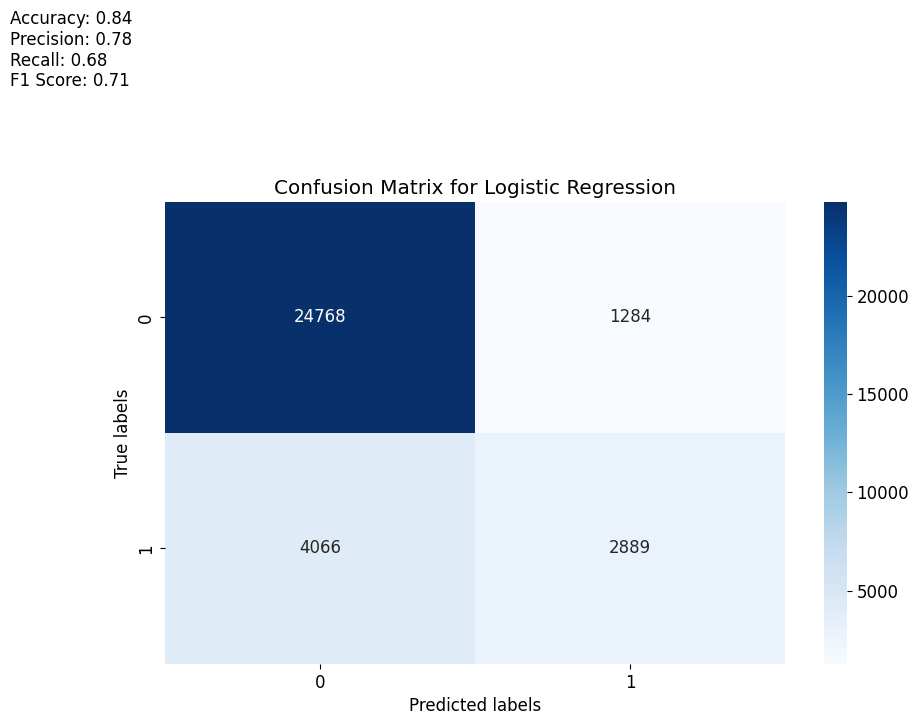

Detailed Classification Metrics:
Accuracy: 0.8379
Precision: 0.7756
Recall: 0.6830
F1 Score: 0.7109
                    CV_Accuracy_CI_lower  CV_Accuracy_CI_upper  \
LogisticRegression              0.833747               0.83679   

                    CV_Accuracy_mean  Confidence_Interval  Test_Accuracy  \
LogisticRegression          0.835269             0.003585       0.837913   

                     Test_F1  Test_Precision  Test_ROC_AUC  Test_Recall  
LogisticRegression  0.519231        0.692308      0.826521     0.415385  


In [ ]:
bank_churn_results = classification_pipeline(bank_churn, 'Exited')
print(bank_churn_results)

#### Ансамбль

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

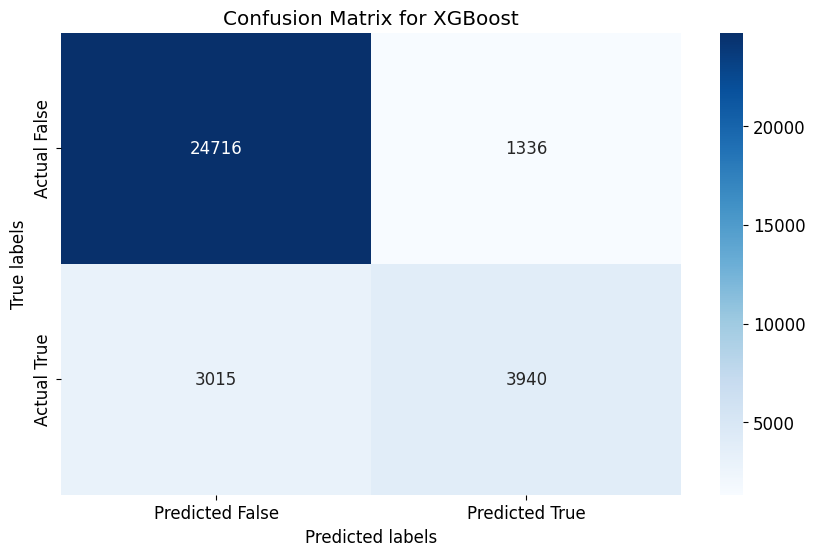

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

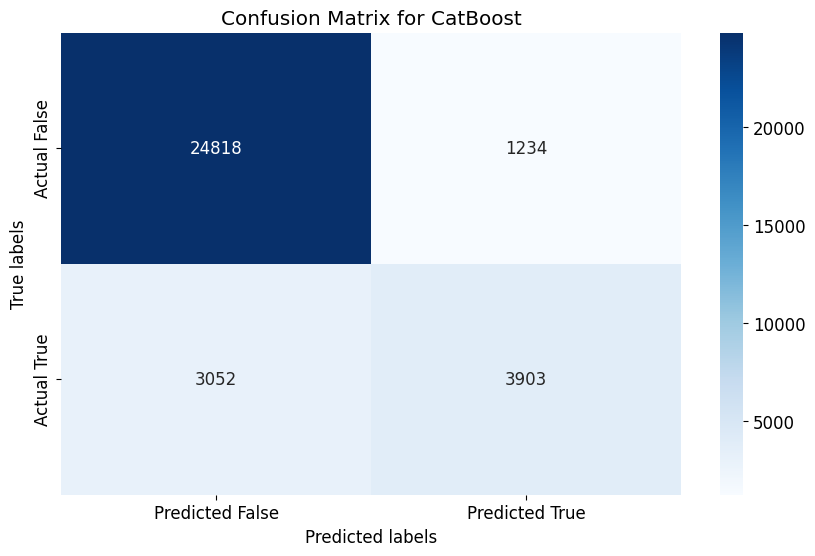

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

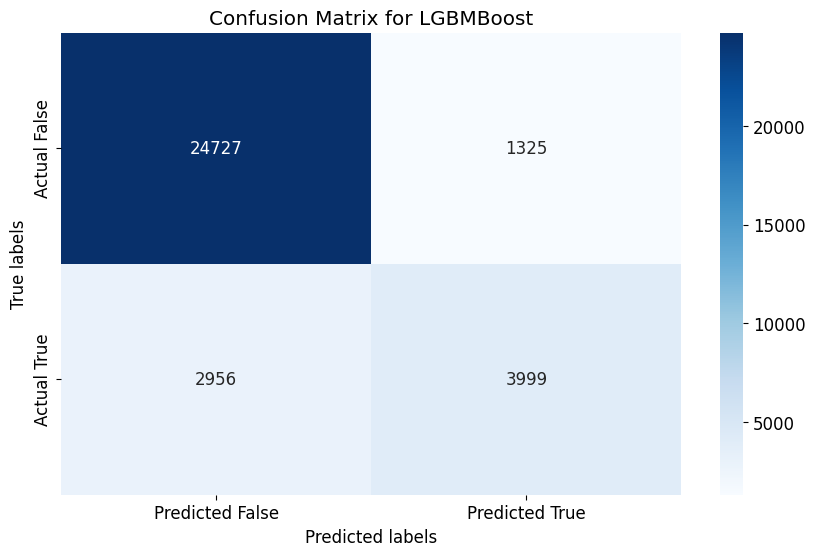

           CV_Accuracy_mean  CV_Accuracy_CI_lower  CV_Accuracy_CI_upper  \
XGBoost            0.866489              0.864749              0.868230   
CatBoost           0.867156              0.865851              0.868461   
LGBMBoost          0.866686              0.865530              0.867843   

           Test_Accuracy  Test_Precision  Test_Recall   Test_F1  Test_ROC_AUC  
XGBoost         0.868179        0.746778     0.566499  0.644265      0.893666  
CatBoost        0.870149        0.759782     0.561179  0.645551      0.895032  
LGBMBoost       0.870300        0.751127     0.574982  0.651356      0.894733  


In [ ]:
metrics_table, roc_data, feature_importances, all_accuracy_scores = classification_pipeline_bi(bank_churn, 'Exited')
print(metrics_table)

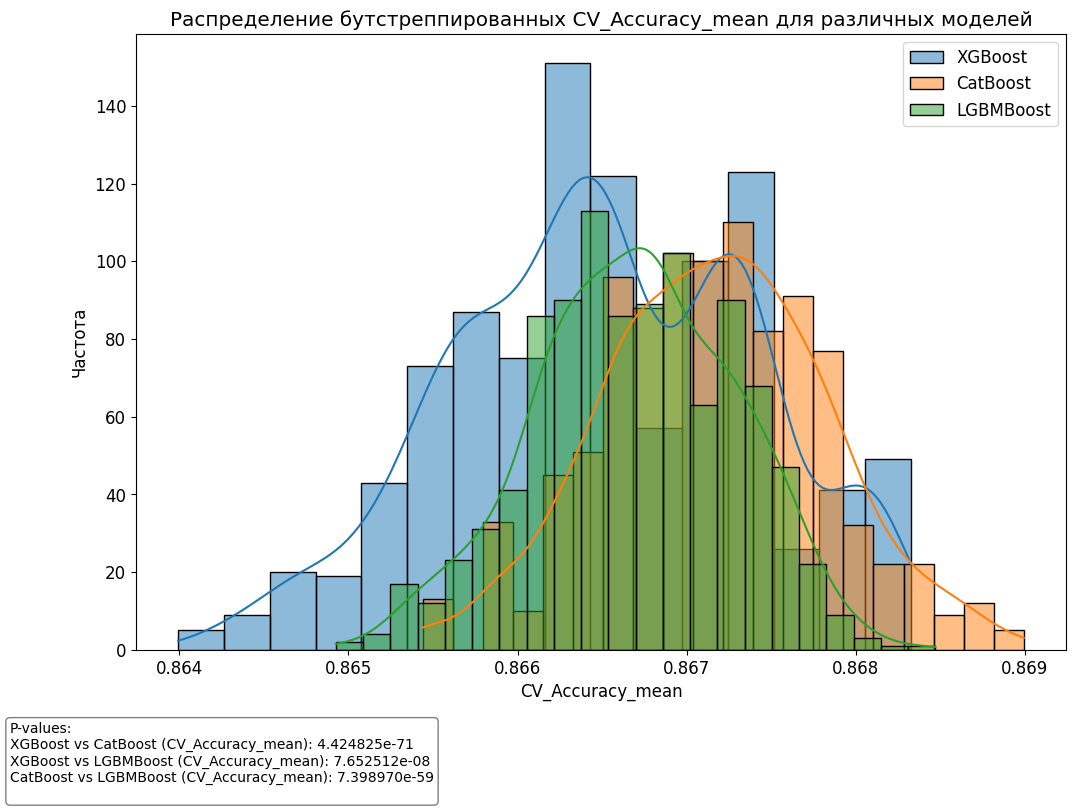

In [ ]:
bootstrapped_metrics = bootstrap_metrics(all_accuracy_scores)
p_values = calculate_statistical_significance_bootstrap(bootstrapped_metrics)
plot_bootstrap_distributions_with_table(bootstrapped_metrics, metrics_table, p_values, 'CV_Accuracy_mean')

In [ ]:
bank_churn_results

,CV_Accuracy_mean,CV_Accuracy_CI_lower,CV_Accuracy_CI_upper,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC,Confidence_Interval
XGBoost,0.866489,0.864749,0.868230,0.868179,0.746778,0.566499,0.644265,0.893666,0.003954
CatBoost,0.867156,0.865851,0.868461,0.870149,0.759782,0.561179,0.645551,0.895032,0.003911
LGBMBoost,0.866686,0.865530,0.867843,0.870300,0.751127,0.574982,0.651356,0.894733,0.003968


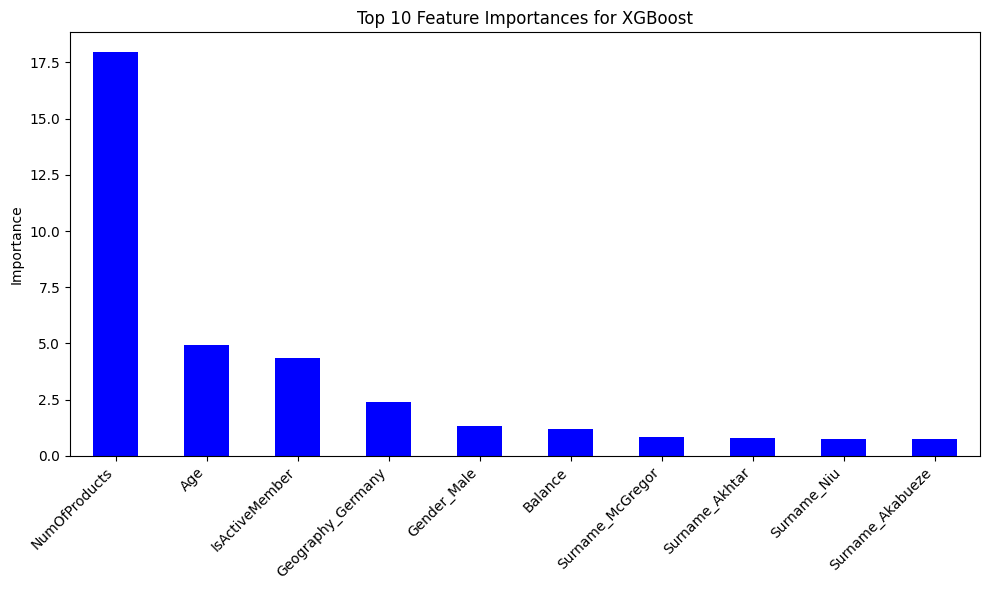

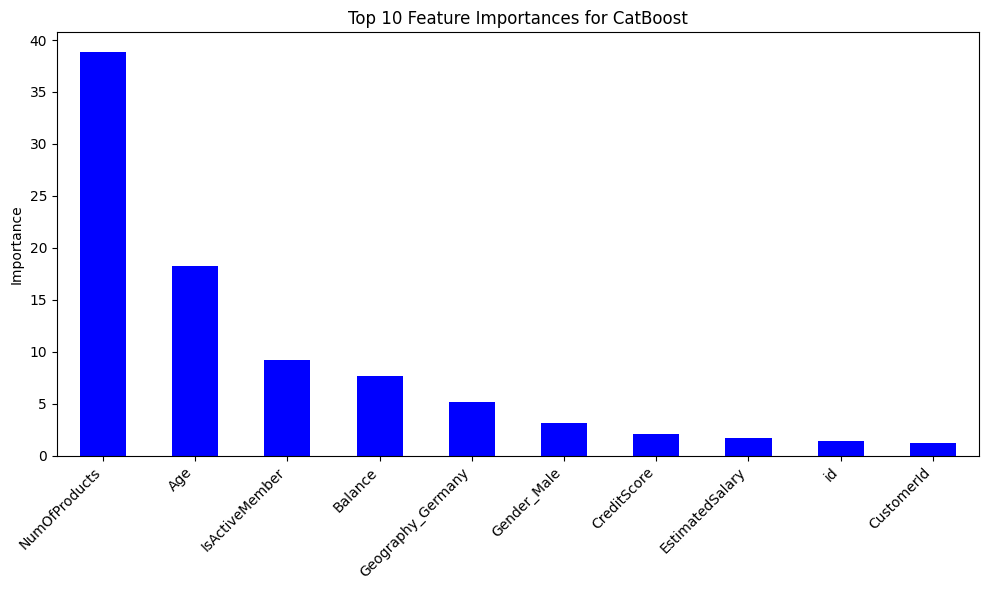

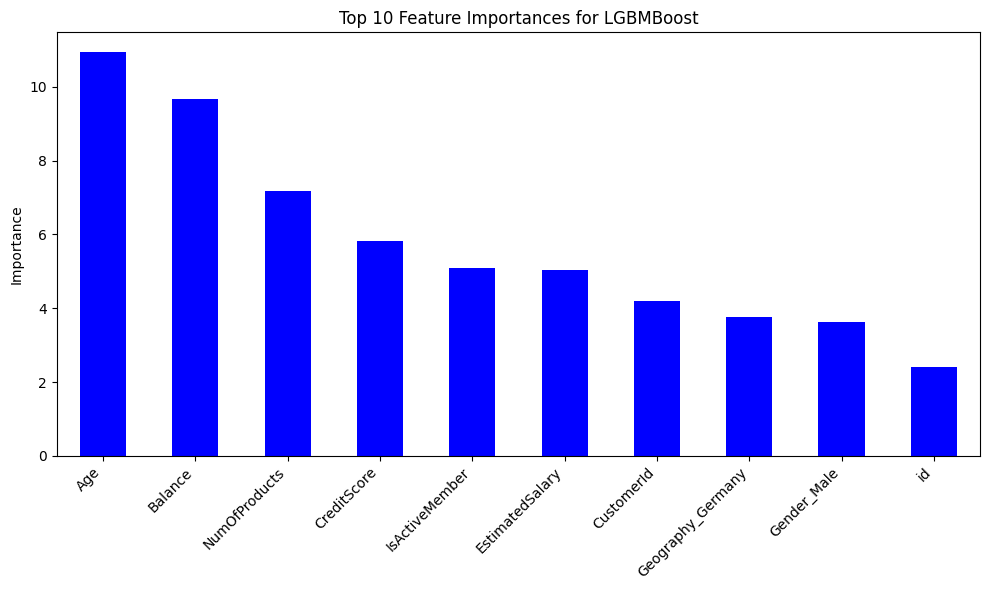

In [ ]:
plot_top_feature_importances(feature_importances, top_n=10)

In [ ]:
top_features = {model: importances.nlargest(10) for model, importances in feature_importances.items()}

# Общие признаки среди топ-10 всех моделей
common_features = set(top_features['XGBoost'].index) & set(top_features['CatBoost'].index) & set(top_features['LGBMBoost'].index)
common_features_list = list(common_features)  # Преобразуем множество в список

# Создание DataFrame только с общими признаками
common_features_df = pd.DataFrame({
    model: features[common_features_list]
    for model, features in top_features.items() if common_features_list
}).T  # Транспонируем для лучшего отображения

# Визуализация
styled_common_features_df = common_features_df.style.background_gradient(cmap='viridis', axis=None)
styled_common_features_df

,IsActiveMember,NumOfProducts,Geography_Germany,Balance,Gender_Male,Age
XGBoost,4.346848,17.944368,2.399207,1.206025,1.321229,4.946480
CatBoost,9.237358,38.799123,5.169903,7.699809,3.195051,18.278116
LGBMBoost,5.100000,7.166667,3.766667,9.666667,3.633333,10.933333


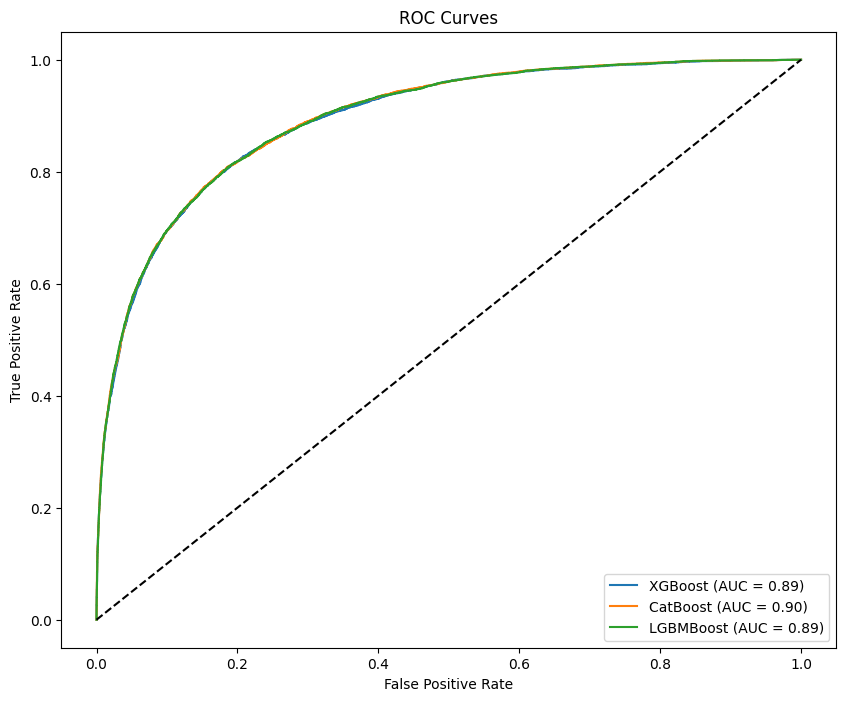

In [ ]:
def plot_roc_curves(roc_data):
    plt.figure(figsize=(10, 8))
    for model, data in roc_data.items():
        plt.plot(data['fpr'], data['tpr'], label=f'{model} (AUC = {data["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curves(roc_data)